In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [101]:
google = pd.read_csv('google.csv')
google.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [102]:
google['Date']=pd.to_datetime(google['Date'])

In [103]:
google['Date']

,Date
0,2004-08-19
1,2004-08-20
2,2004-08-23
3,2004-08-24
4,2004-08-25
...,...
4312,2021-10-05
4313,2021-10-06
4314,2021-10-07
4315,2021-10-08


In [104]:
google['year']=google['Date'].dt.year
google['month']=google['Date'].dt.month
google['day']=google['Date'].dt.day

In [105]:
google.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,year,month,day
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655,2004,8,19
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770,2004,8,20
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735,2004,8,23


In [106]:
google.drop('Date',axis=1,inplace=True)

In [107]:
google

,High,Low,Open,Close,Volume,Adj Close,year,month,day
0,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655,2004,8,19
1,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770,2004,8,20
2,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735,2004,8,23
3,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197,2004,8,24
4,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086,2004,8,25
...,...,...,...,...,...,...,...,...,...
4312,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039,2021,10,5
4313,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078,2021,10,6
4314,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961,2021,10,7
4315,2806.340088,2788.586914,2798.120117,2801.120117,946200.0,2801.120117,2021,10,8


In [108]:
google.shape

(4317, 9)

In [109]:
google.isnull().sum()

,0
High,0
Low,0
Open,0
Close,0
Volume,0
Adj Close,0
year,0
month,0
day,0


In [110]:
google.duplicated().sum()

0

In [111]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4317 non-null   float64
 1   Low        4317 non-null   float64
 2   Open       4317 non-null   float64
 3   Close      4317 non-null   float64
 4   Volume     4317 non-null   float64
 5   Adj Close  4317 non-null   float64
 6   year       4317 non-null   int32  
 7   month      4317 non-null   int32  
 8   day        4317 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 253.1 KB


In [112]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close,year,month,day
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000,4317.000000,4317.000000,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357,2012.700255,6.567292,15.740561
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541,4.963727,3.417765,8.755952
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268,2004.000000,1.000000,1.000000
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183,2008.000000,4.000000,8.000000
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096,2013.000000,7.000000,16.000000
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988,2017.000000,10.000000,23.000000
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088,2021.000000,12.000000,31.000000


EDA

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
corr=google.corr()

In [115]:
corr

,High,Low,Open,Close,Volume,Adj Close,year,month,day
High,1.000000,0.999878,0.999921,0.999911,-0.475519,0.999911,0.859562,-0.005583,-0.000099
Low,0.999878,1.000000,0.999903,0.999924,-0.477739,0.999924,0.859258,-0.004593,0.000054
Open,0.999921,0.999903,1.000000,0.999828,-0.476542,0.999828,0.859498,-0.005088,0.000326
Close,0.999911,0.999924,0.999828,1.000000,-0.476672,1.000000,0.859400,-0.005352,-0.000493
Volume,-0.475519,-0.477739,-0.476542,-0.476672,1.000000,-0.476672,-0.684199,-0.061491,0.010288
Adj Close,0.999911,0.999924,0.999828,1.000000,-0.476672,1.000000,0.859400,-0.005352,-0.000493
year,0.859562,0.859258,0.859498,0.859400,-0.684199,0.859400,1.000000,-0.071291,-0.005239
month,-0.005583,-0.004593,-0.005088,-0.005352,-0.061491,-0.005352,-0.071291,1.000000,-0.000709
day,-0.000099,0.000054,0.000326,-0.000493,0.010288,-0.000493,-0.005239,-0.000709,1.000000


<Axes: >

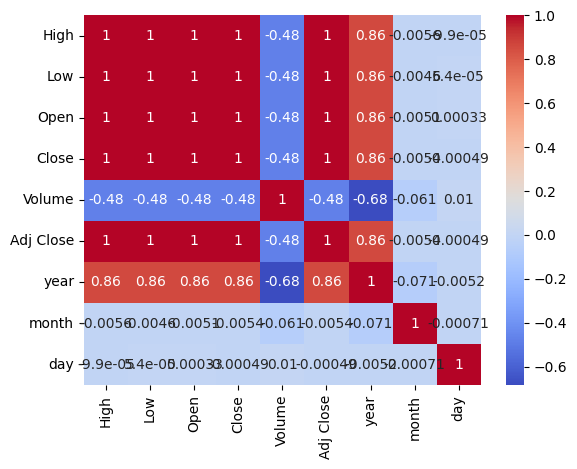

In [116]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar='True')

DATA SCATTERNESS

<Axes: xlabel='Open', ylabel='Close'>

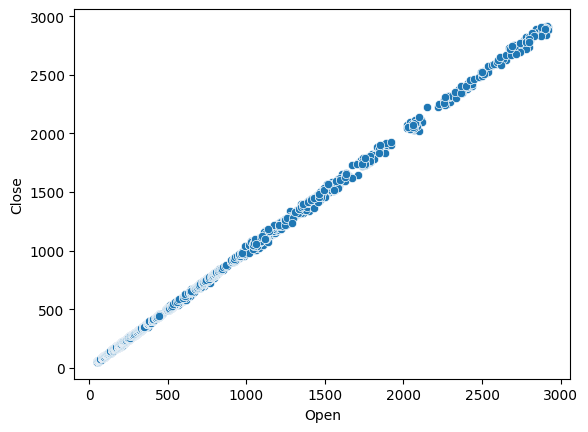

In [117]:
sns.scatterplot(x=google['Open'],y=google['Close'])

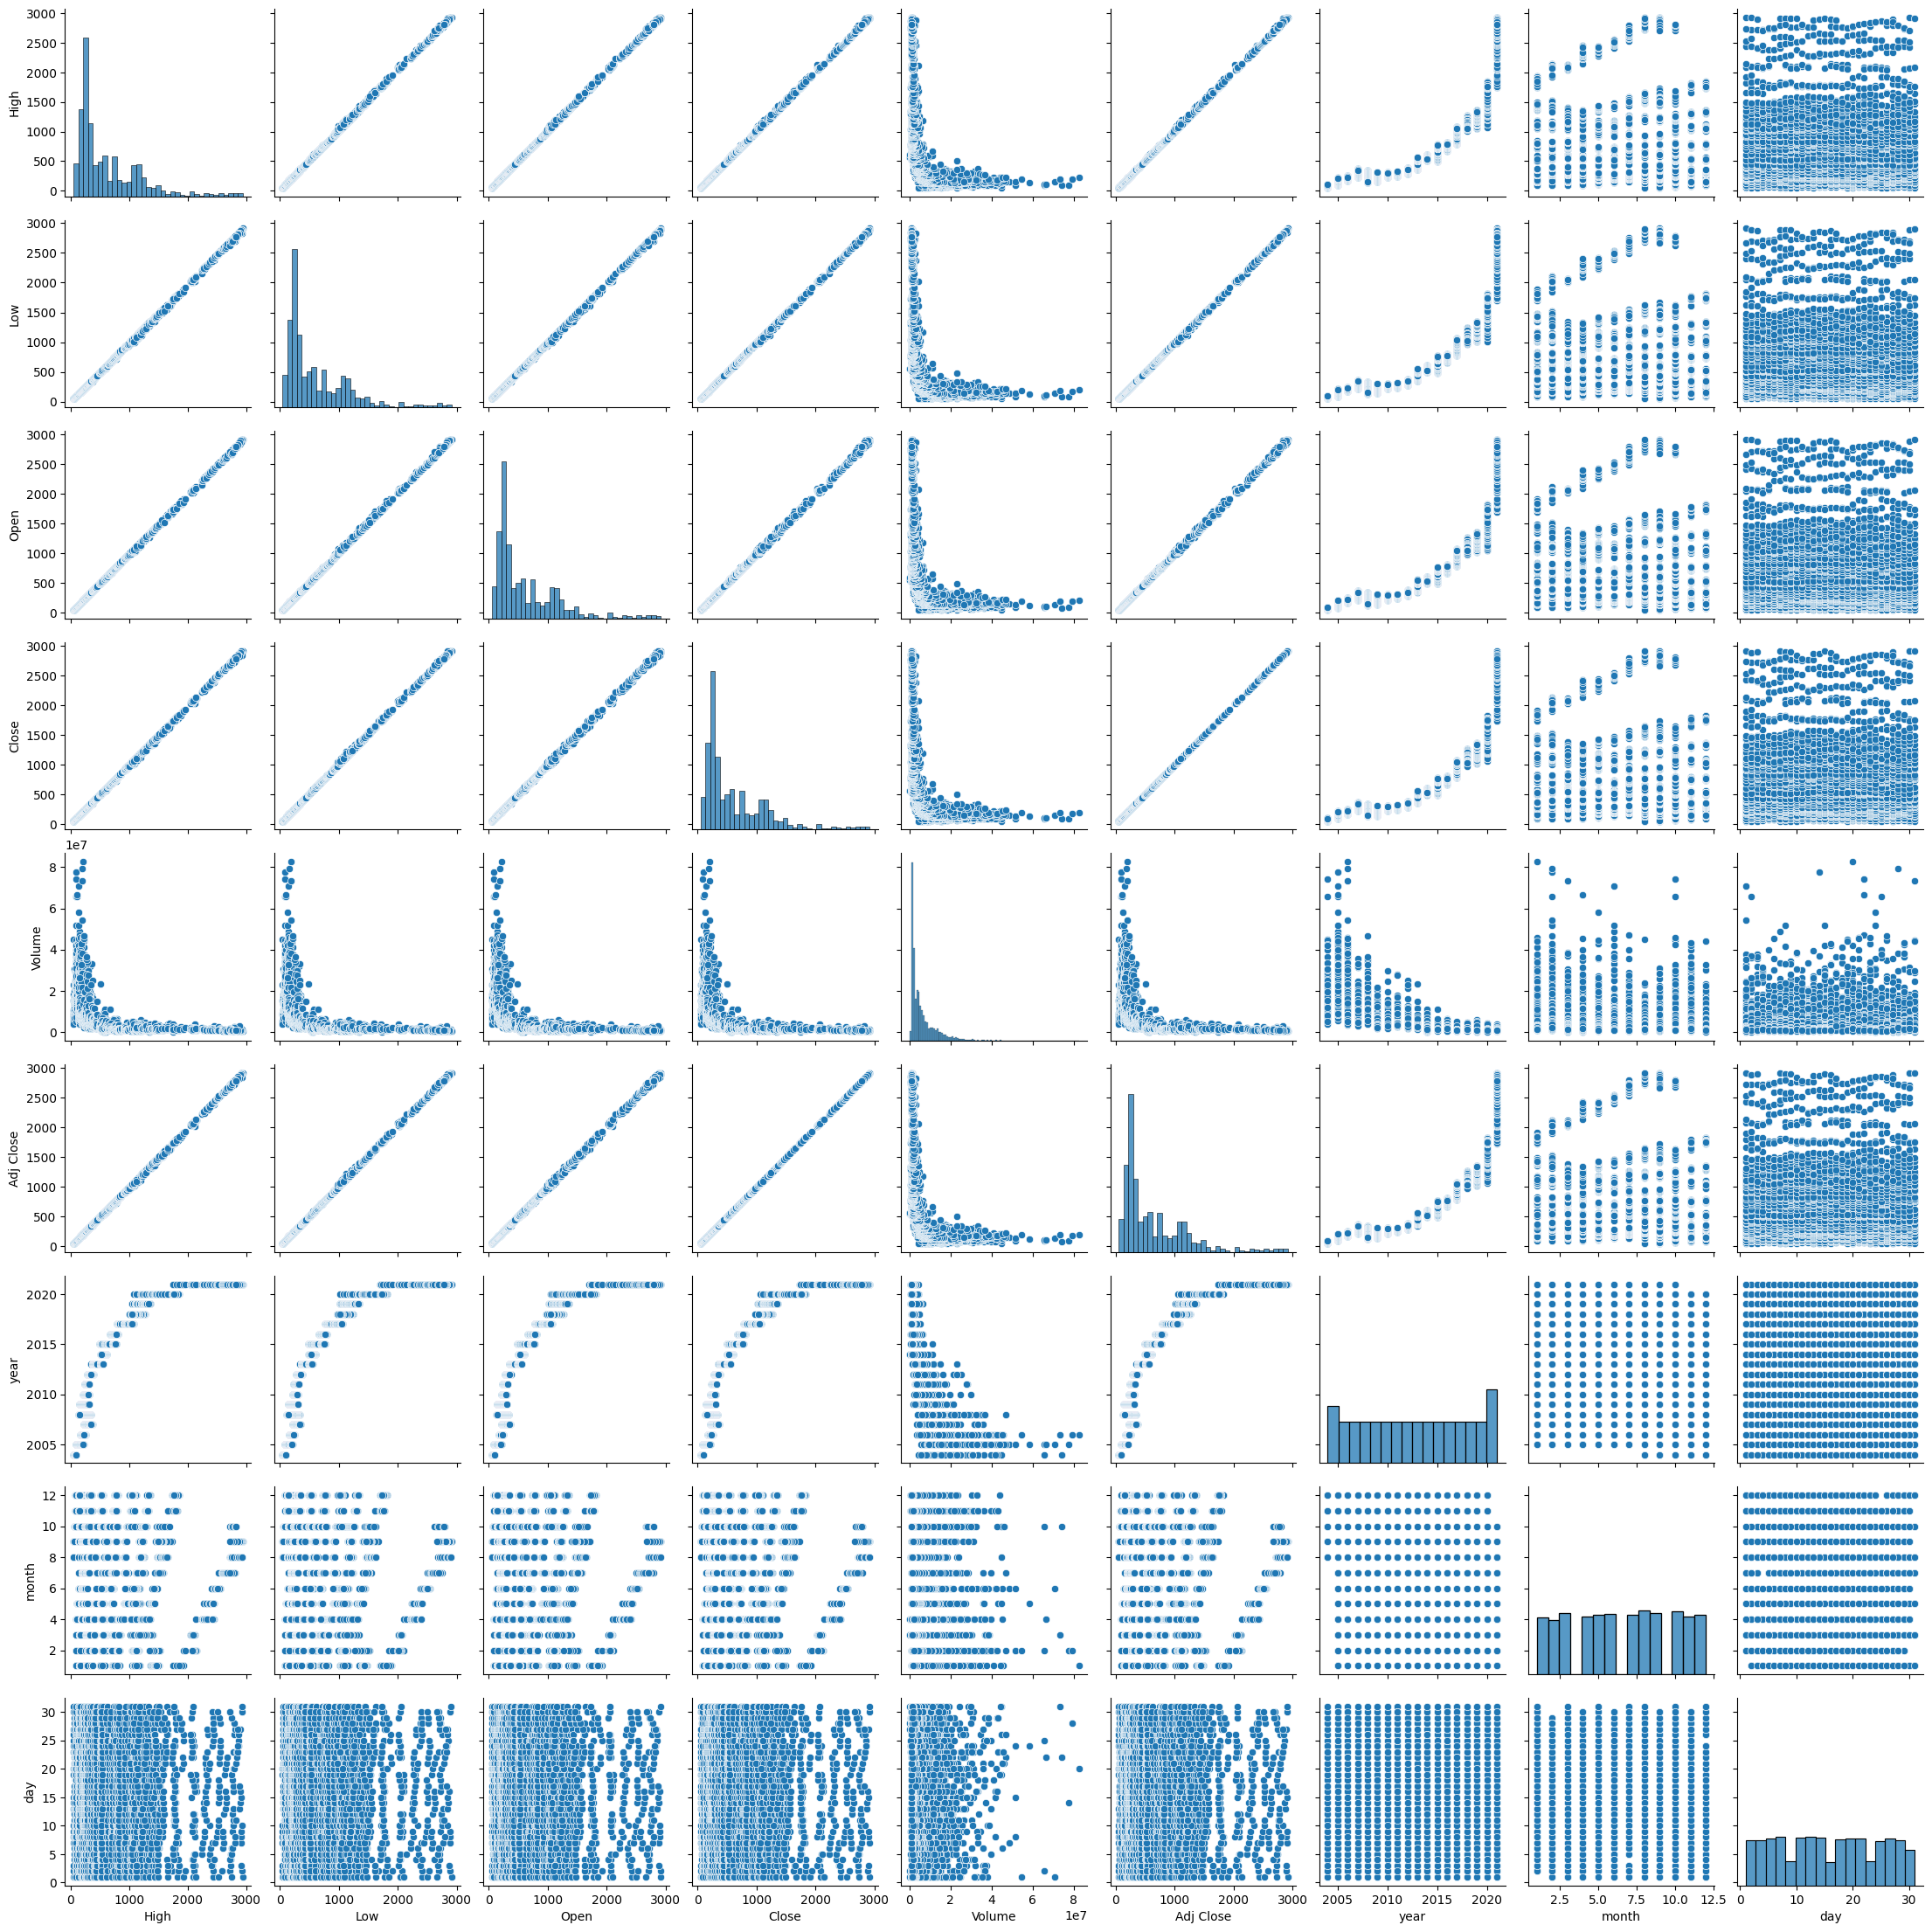

In [118]:
sns.pairplot(google)

DATA DISTRIBUTION

<Axes: xlabel='Close', ylabel='Count'>

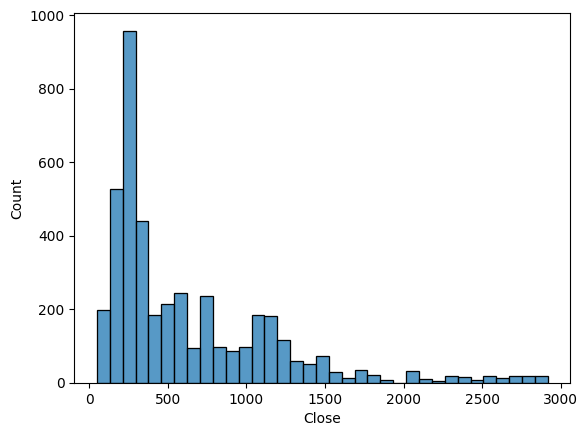

In [119]:
sns.histplot(google['Close'])

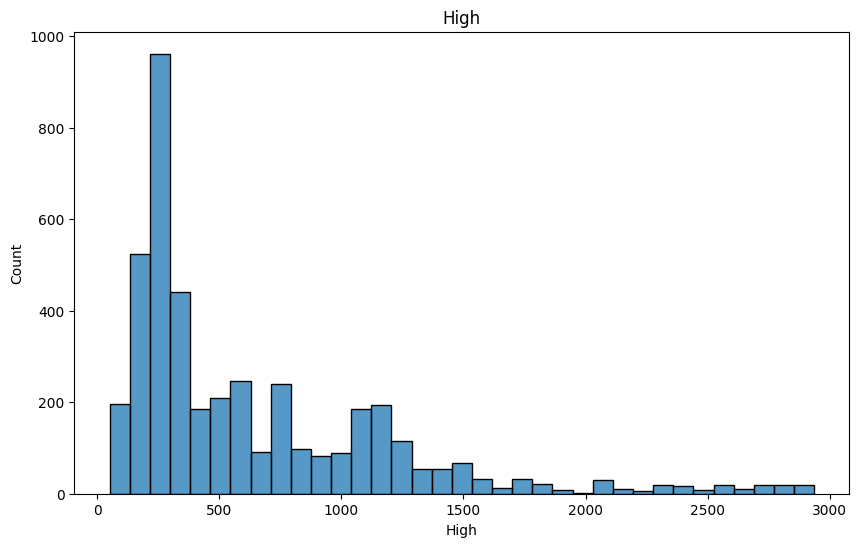

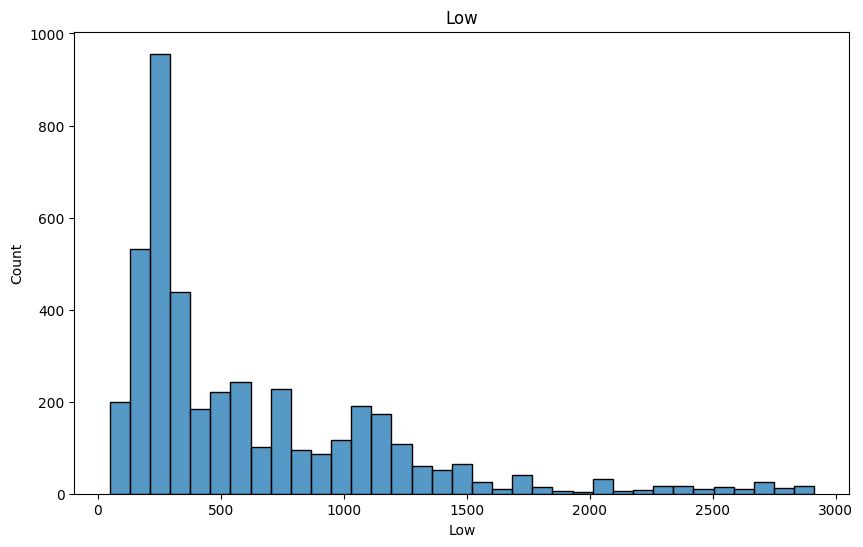

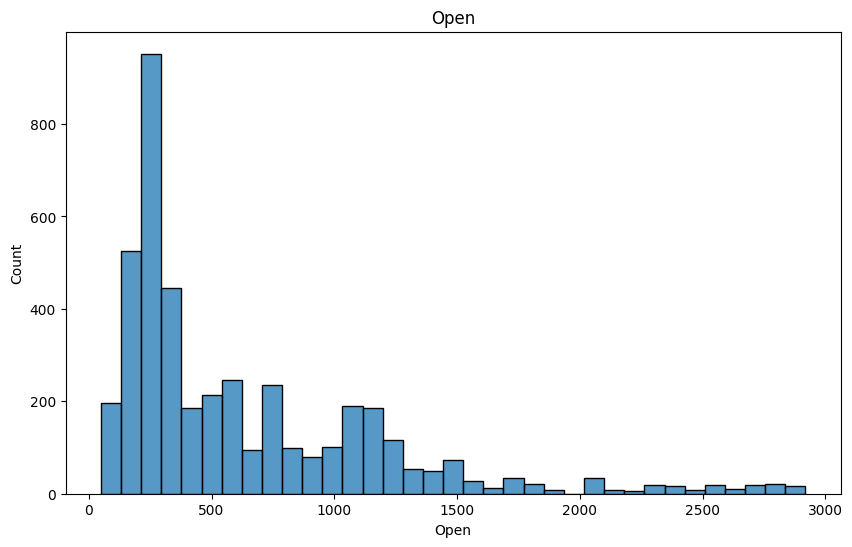

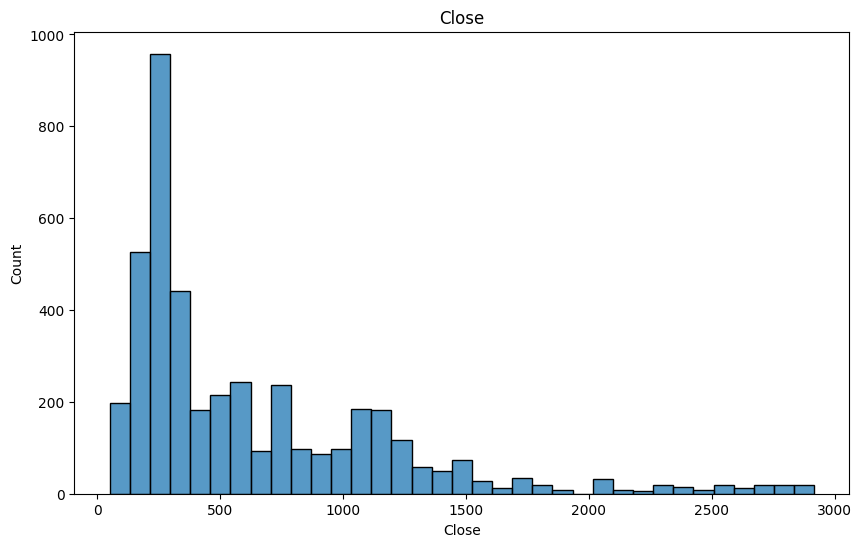

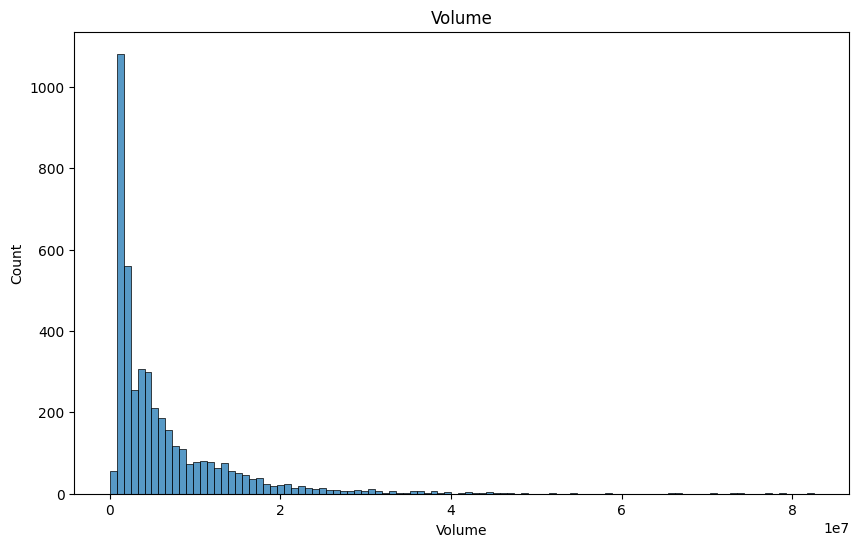

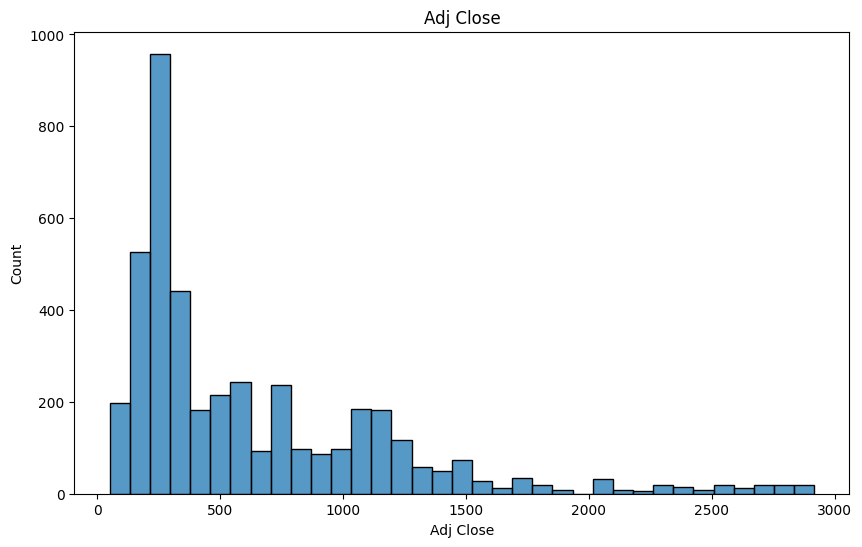

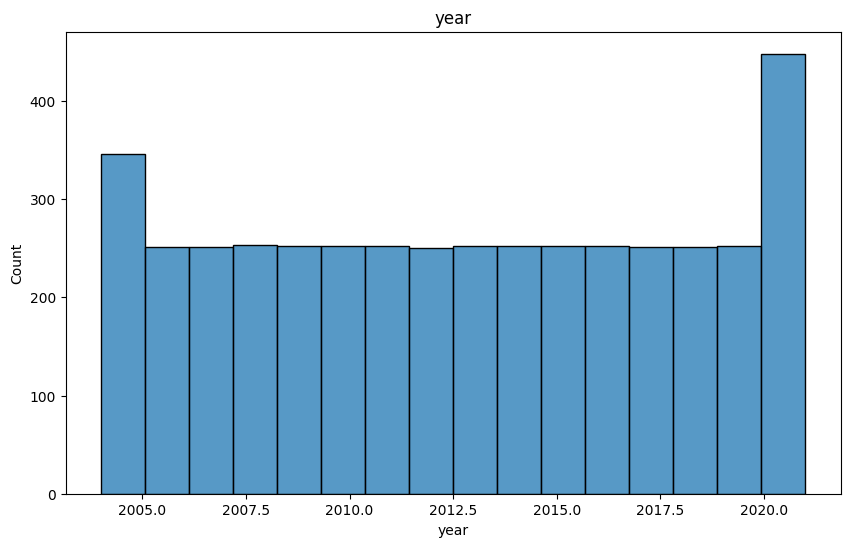

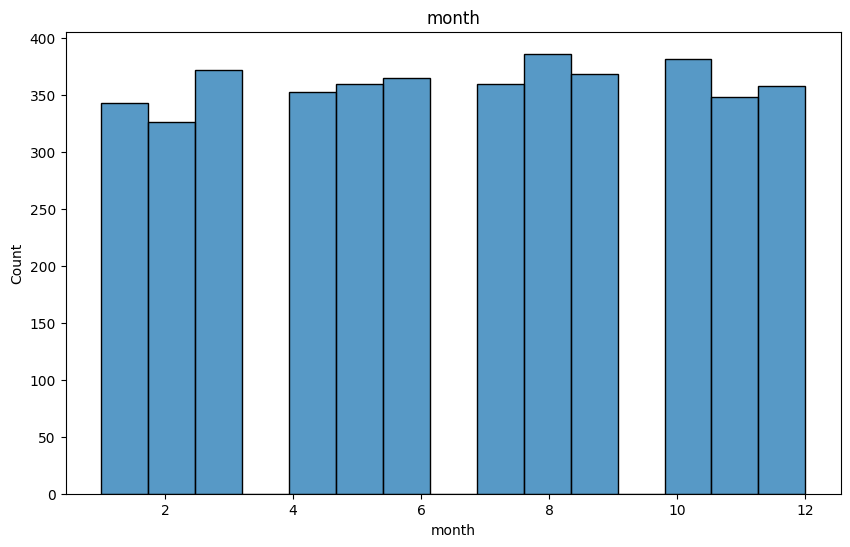

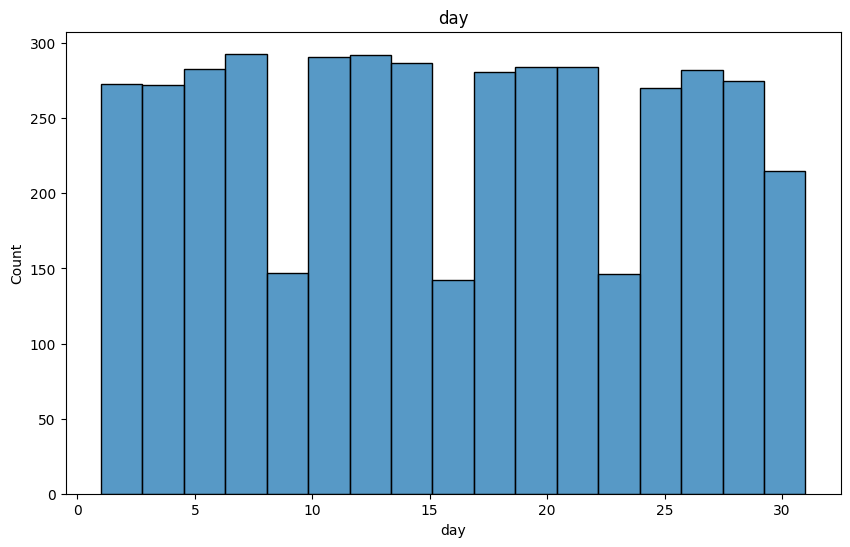

In [120]:
for i in google.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(google[i])
    plt.title(i)
    plt.show()

TRAIN TEST SPLIT

In [121]:
x=google.drop('Close',axis=1)
y=google['Close']

In [122]:
x.shape

(4317, 8)

In [123]:
y.shape

(4317,)

In [124]:
print(x)

             High          Low         Open      Volume    Adj Close  year  \
0       51.835709    47.800831    49.813290  44871361.0    49.982655  2004   
1       54.336334    50.062355    50.316402  22942874.0    53.952770  2004   
2       56.528118    54.321388    55.168217  18342897.0    54.495735  2004   
3       55.591629    51.591621    55.412300  15319808.0    52.239197  2004   
4       53.798351    51.746044    52.284027   9232276.0    52.802086  2004   
...           ...          ...          ...         ...          ...   ...   
4312  2747.239990  2680.000000  2680.000000   1206300.0  2723.540039  2021   
4313  2757.040039  2689.729980  2692.510010    988200.0  2747.080078  2021   
4314  2803.089111  2771.260010  2777.260010    912500.0  2783.709961  2021   
4315  2806.340088  2788.586914  2798.120117    946200.0  2801.120117  2021   
4316  2815.272949  2776.129883  2796.000000    828700.0  2776.949951  2021   

      month  day  
0         8   19  
1         8   20  
2     

In [125]:
print(y)

0         49.982655
1         53.952770
2         54.495735
3         52.239197
4         52.802086
           ...     
4312    2723.540039
4313    2747.080078
4314    2783.709961
4315    2801.120117
4316    2776.949951
Name: Close, Length: 4317, dtype: float64


In [126]:
sclr = StandardScaler()

In [127]:
x = sclr.fit_transform(x)

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [129]:
sclr = StandardScaler()
x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)

In [130]:
print(x.shape,x_train.shape,x_test.shape)

(4317, 8) (3453, 8) (864, 8)


Normalizating Data Using StandarScaler

In [131]:
x_train

array([[-0.86698952, -0.86489672, -0.86744192, ..., -1.56753547,
         0.71528085,  1.27035928],
       [ 0.71562378,  0.71546251,  0.70519242, ...,  1.06097031,
        -0.74032073, -0.43966356],
       [ 1.04810422,  1.04623436,  1.066925  , ...,  1.06097031,
         0.42416053,  0.01634253],
       ...,
       [ 0.24520665,  0.25305047,  0.24596633, ...,  0.6565848 ,
         1.29752148,  1.49836232],
       [ 0.96969845,  0.96951115,  0.97921371, ...,  1.26316306,
         0.42416053, -0.21166052],
       [-0.60639213, -0.60555601, -0.60268239, ..., -0.96095721,
        -1.61368168,  0.24434557]])

In [132]:
y

,Close
0,49.982655
1,53.952770
2,54.495735
3,52.239197
4,52.802086
...,...
4312,2723.540039
4313,2747.080078
4314,2783.709961
4315,2801.120117


USING REGRESSION

In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_train)

In [134]:
y_pred

array([ 156.38383484, 1032.51000977, 1206.48999023, ...,  770.84002686,
       1164.29003906,  299.00427246])

Evaluation

In [135]:
from sklearn.metrics import r2_score,mean_squared_error

In [136]:
r2_score(y_train,y_pred)

1.0

In [137]:
y_pred_train = lr.predict(x_train)
print("R2 Score (Train):", r2_score(y_train, y_pred_train))
print("MSE (Train):", mean_squared_error(y_train, y_pred_train))


R2 Score (Train): 1.0
MSE (Train): 8.032617467810997e-25


In [138]:

y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)


1.0

In [143]:
y_pred_test = lr.predict(x_test)
print("R2 Score (Test):", r2_score(y_test, y_pred_test))
print("MSE (Test):", mean_squared_error(y_test, y_pred_test))

R2 Score (Test): 1.0
MSE (Test): 8.649948645642909e-25


Prediction Model

In [139]:
def pred(High, Low, Open, Volume, Adj_Close, year, month, day):
    features = np.array([High, Low, Open, Volume, Adj_Close, year, month, day]).reshape(1, -1)
    features = sclr.transform(features)
    prediction = lr.predict(features)
    return prediction[0]


In [140]:
Open = 200.4500
High = 250.8552
Low = 152.455
Adj_Close = 120.369
Volume = 1205.65
year = 2018
month = 9
day = 6

res = pred(High,Low,Open,Volume,Adj_Close,year,month,day)
print("Prediction:", res)

Prediction: 67702.37527320308


In [141]:
print(res)

67702.37527320308


In [142]:
input_data = ['2004-09-07', 50.80955123901367, 49.619014739990234,
              50.316402435302734, 50.600337982177734, 5875340.0,
              50.600337982177734]

date = pd.to_datetime(input_data[0])
year = date.year
month = date.month
day = date.day

processed_data = [input_data[1], input_data[2], input_data[3], input_data[4],
                  input_data[5], year, month, day]

input_data_as_np_array = np.asarray(processed_data)
data = input_data_as_np_array.reshape(1, -1)
data = sclr.transform(data)
data_prediction = lr.predict(data)
print("Prediction:", data_prediction)

Prediction: [3.27368718e+09]
